In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
monthly = pd.read_pickle("../Dataframes/df_monthly_temp.pkl")
daily = pd.read_pickle("../Dataframes/df_daily_temp.pkl")
precip = pd.read_pickle("../Dataframes/df_precipitation.pkl")
snodjup = pd.read_pickle("../Dataframes/df_snow_save.pkl")

In [5]:
monthly

,Year,Month,Monthly avg
0,1944,1,2.03
1,1944,2,0.18
2,1944,3,0.96
3,1944,4,6.08
4,1944,5,10.74
...,...,...,...
953,2023,6,18.59
954,2023,7,16.78
955,2023,8,17.00
956,2023,9,17.02


([<matplotlib.axis.XTick at 0x17f15bb5b80>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'Maj'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Okt'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

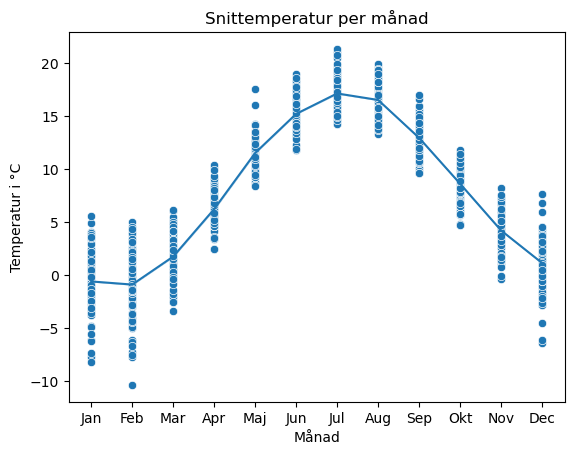

In [6]:
sns.scatterplot(x=monthly['Month'], y=monthly['Monthly avg'], data=monthly)
sns.lineplot(x='Month', y= 'Monthly avg', data=monthly, errorbar=('ci', 0))
plt.title('Snittemperatur per månad')
plt.xlabel('Månad')
plt.ylabel('Temperatur i °C')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'])
# plt.savefig("../plottar/manadtempovertid.png")

Text(33.37500000000001, 0.5, 'Temperatur i °C')

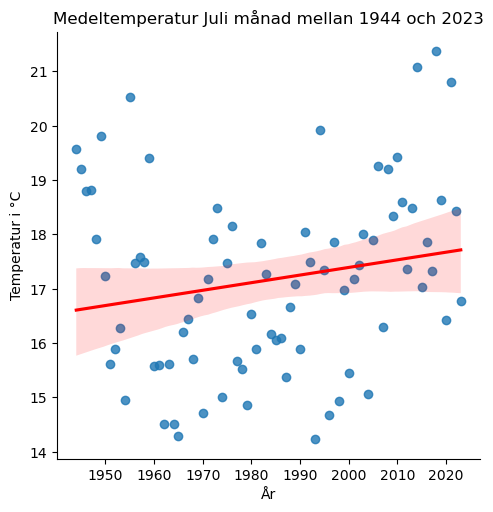

In [7]:
juli = monthly.query("Month == 7")
sns.lmplot(data=juli, x='Year', y='Monthly avg', line_kws={'color': 'red'})
plt.title('Medeltemperatur Juli månad mellan 1944 och 2023')
plt.xlabel('År')
plt.ylabel('Temperatur i °C')
# plt.savefig("../plottar/julitempovertid.png")

In [8]:
print(juli['Monthly avg'].min())
print(round(juli['Monthly avg'].mean(),2))
print(juli['Monthly avg'].max())

14.23
17.16
21.37


# Vi ser klart och tydligt att Juli blir varmare med tiden
- Blir det även varmare över tid i December?

Text(30.625000000000007, 0.5, 'Temperatur i °C')

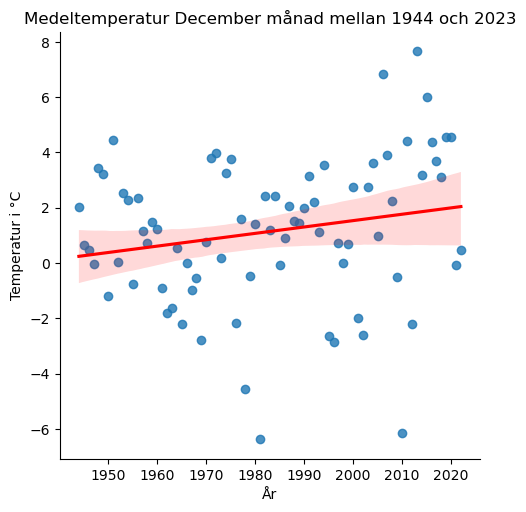

In [9]:
december = monthly.query("Month == 12")
sns.lmplot(data=december, x='Year', y='Monthly avg', line_kws={'color': 'red'})
plt.title('Medeltemperatur December månad mellan 1944 och 2023')
plt.xlabel('År')
plt.ylabel('Temperatur i °C')
# plt.savefig("../plottar/decembertempovertid.png")

In [10]:
print(december['Monthly avg'].min())
print(round(december['Monthly avg'].mean(),2))
print(december['Monthly avg'].max())

-6.38
1.14
7.65


Hur ser det ut över tid?

Text(21.750000000000007, 0.5, 'Temperatur i °C')

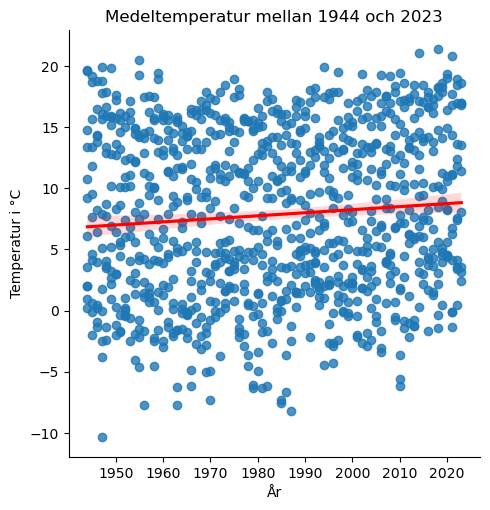

In [11]:
sns.lmplot(data=monthly, x='Year', y='Monthly avg', line_kws={'color': 'red'})
plt.title('Medeltemperatur mellan 1944 och 2023')
plt.xlabel('År')
plt.ylabel('Temperatur i °C')
# plt.savefig("../plottar/medeltempår.png")

- Temperaturen stämmer ju överens med vad dagens forskning säger om global uppvärmning.

In [12]:
precip

,Representativt dygn,Nederbördsmängd,Kvalitet,Year,Month,Monthly avg
0,1944-01-01,0.2,G,1944,1,2.70
1,1944-01-02,0.4,G,1944,1,2.70
2,1944-01-03,0.0,G,1944,1,2.70
3,1944-01-04,0.0,G,1944,1,2.70
4,1944-01-05,2.1,G,1944,1,2.70
...,...,...,...,...,...,...
29031,2023-06-26,18.5,G,2023,6,1.31
29032,2023-06-27,10.6,G,2023,6,1.31
29033,2023-06-28,0.0,G,2023,6,1.31
29034,2023-06-29,5.0,G,2023,6,1.31


# Vid vilken period regnar det mest?

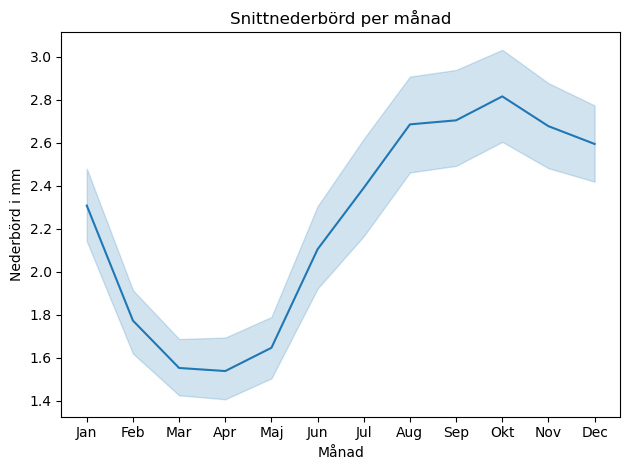

In [13]:
sns.lineplot(x = precip['Month'], y = precip['Nederbördsmängd'], data = precip)
plt.title('Snittnederbörd per månad')
plt.xlabel('Månad')
plt.ylabel('Nederbörd i mm')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'])
plt.tight_layout()
# plt.savefig("../plottar/regnpermanad.png")

* Enligt grafen verkar det helt klart som att höstmånaderna (September, Oktober, November)

In [14]:
oktoberregn = precip.query("Month == 10")
aprilregn = precip.query("Month == 4")
aprilregn.head()

,Representativt dygn,Nederbördsmängd,Kvalitet,Year,Month,Monthly avg
91,1944-04-01,0.0,G,1944,4,1.2
92,1944-04-02,0.0,G,1944,4,1.2
93,1944-04-03,0.0,G,1944,4,1.2
94,1944-04-04,0.0,G,1944,4,1.2
95,1944-04-05,0.0,G,1944,4,1.2


Text(42.25000000000001, 0.5, 'Nederbörd i mm')

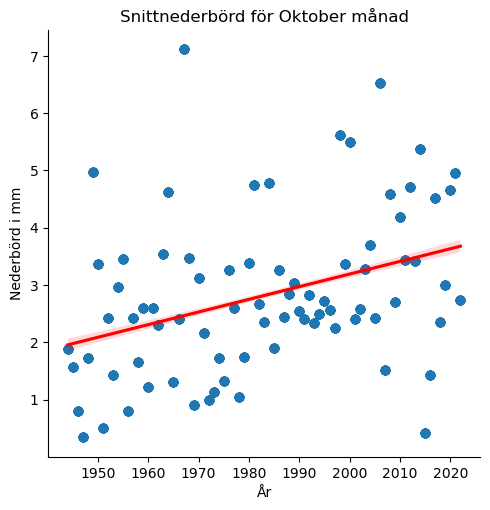

In [15]:
sns.lmplot(x='Year', y='Monthly avg', data=oktoberregn, line_kws={'color': 'red'})
plt.title('Snittnederbörd för Oktober månad')
plt.xlabel('År')
plt.ylabel('Nederbörd i mm')
# plt.savefig('../plottar/oktoberregn.png')

 Som vi ser här så verkar det som att Oktober månad blivit mer regnig på senare år jämfört med tidigare år.
 
Är denna prognosen sann även för den minst regniga månaden April?

Text(29.000000000000007, 0.5, 'Nederbörd i mm')

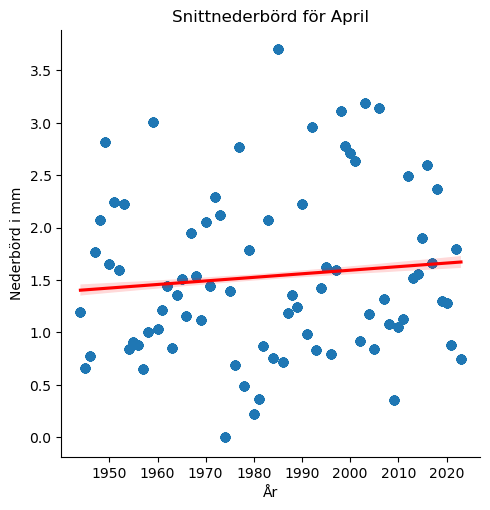

In [16]:
sns.lmplot(x='Year', y='Monthly avg', data=aprilregn, line_kws={'color': 'red'})
plt.title('Snittnederbörd för April')
plt.xlabel('År')
plt.ylabel('Nederbörd i mm')
# plt.savefig('../plottar/aprilregn.png')

Det verkar även här som att den torraste månaden blir blötare över tid. Vad kan det bero på?

Hur ser det ut över hela året?

Text(42.25000000000001, 0.5, 'Nederbörd i mm')

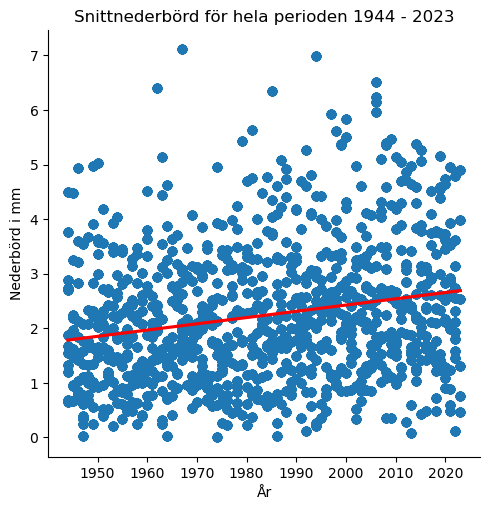

In [17]:
sns.lmplot(x='Year', y='Monthly avg', data=precip, line_kws={'color': 'red'})
plt.title('Snittnederbörd för hela perioden 1944 - 2023')
plt.xlabel('År')
plt.ylabel('Nederbörd i mm')
# plt.savefig("../plottar/regnperår.png")

Det verkar onekligen som att trenden är densamma över tid, vare sig det är vår eller höst

# Snödjup

- Snödjupet är taget från Säve mellan 1944 och 2003

In [77]:
snodjup['Datum'] = pd.to_datetime(snodjup['Datum'])
snodjup['Year'] = snodjup['Datum'].dt.year
snodjup['Month'] = snodjup['Datum'].dt.month
snodjup

,Datum,Tid_UTC,Snödjup,Kvalitet,Markens_tillstånd,Kvalitet_1,Year,Month
0,1944-01-01,07:00:00,0.0,G,0,G,1944,1
1,1944-01-02,07:00:00,0.0,G,0,G,1944,1
2,1944-01-03,07:00:00,0.0,G,0,G,1944,1
3,1944-01-04,07:00:00,0.0,G,0,G,1944,1
4,1944-01-05,07:00:00,0.0,G,0,G,1944,1
...,...,...,...,...,...,...,...,...
15181,2002-11-24,06:00:00,0.0,G,2,G,2002,11
15182,2002-11-25,06:00:00,0.0,G,2,G,2002,11
15183,2002-11-26,06:00:00,0.0,G,2,G,2002,11
15184,2002-11-30,06:00:00,0.0,G,11,G,2002,11


In [78]:
snodjup2 = snodjup.query("Snödjup >= .01")


snodjup2

,Datum,Tid_UTC,Snödjup,Kvalitet,Markens_tillstånd,Kvalitet_1,Year,Month
8,1944-01-09,07:00:00,0.04,G,17,G,1944,1
9,1944-01-10,07:00:00,0.05,G,17,G,1944,1
10,1944-01-11,07:00:00,0.05,G,17,G,1944,1
11,1944-01-12,07:00:00,0.05,G,17,G,1944,1
12,1944-01-13,07:00:00,0.05,G,17,G,1944,1
...,...,...,...,...,...,...,...,...
14980,2002-02-26,06:00:00,0.03,G,17,G,2002,2
14981,2002-02-27,06:00:00,0.02,G,13,G,2002,2
15159,2002-10-19,06:00:00,0.21,G,13,G,2002,10
15160,2002-10-20,06:00:00,0.20,G,13,G,2002,10


Snödjup är räknat i antal meter, minimum 0.01 (1 cm)



<Axes: xlabel='Month', ylabel='Snödjup'>

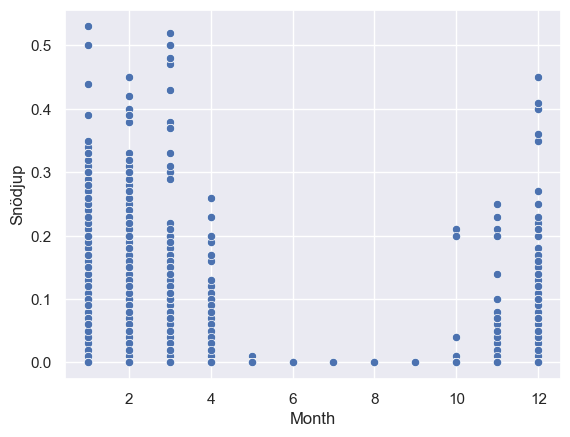

In [79]:
sns.scatterplot(data= snodjup, x='Month', y = 'Snödjup')

In [87]:
print(snodjup['Snödjup'].min())
print(snodjup['Snödjup'].mean())
print(snodjup['Snödjup'].max())

0.0
0.01430784442979565
0.53


<Axes: xlabel='Month', ylabel='Snödjup'>

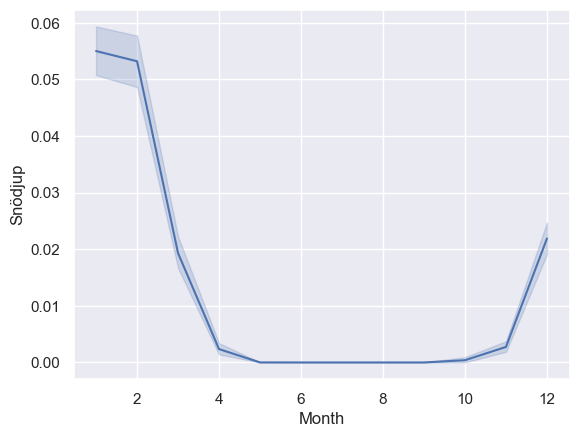

In [85]:
sns.lineplot(data=snodjup, x = 'Month', y = 'Snödjup')

Det ser ju ändå rimligt ut att ingen av observationerna skett mellan Juni och September i Göteborg för perioden

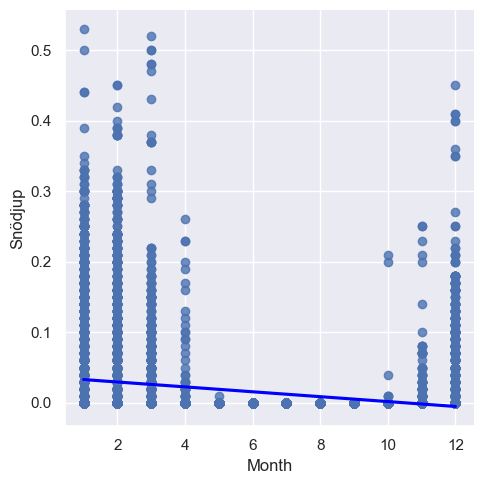

In [83]:
sns.lmplot(data = snodjup, x = 'Month', y = 'Snödjup', line_kws={'color' : 'blue'})

När vi räknar snittdjupet och inkluderar sommarmånaderna juni, juli augusti och även september så minskar snittdjupet rätt så rejält.

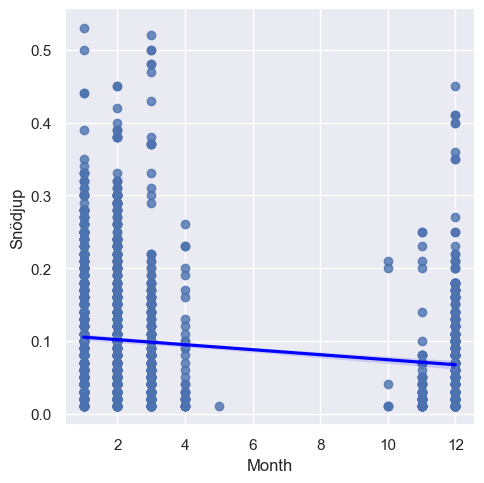

In [82]:
sns.lmplot(data = snodjup2, x = 'Month', y = 'Snödjup', line_kws={'color' : 'blue'})

Det är mindre snö i slutet av året